In [1]:
import pandas as pd

In [324]:
df = pd.read_csv('takehome_user_engagement.csv')

In [325]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [326]:
#takehome_users = pd.read_csv('new_name.csv')

df_user=pd.read_csv('takehome_users.csv',encoding="latin")

In [327]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [328]:
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [329]:
df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [330]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Goal: Define an "adopted user"

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user adoption.

In [331]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [333]:
# Get Difference between days from user so we can find a 3 day strech 

df['day_diff'] = df.groupby('user_id').time_stamp.diff().dt.days

In [334]:
df.head()

,time_stamp,user_id,visited,day_diff
0,2014-04-22 03:53:30,1,1,NaN
1,2013-11-15 03:45:04,2,1,NaN
2,2013-11-29 03:45:04,2,1,14.0
3,2013-12-09 03:45:04,2,1,10.0
4,2013-12-25 03:45:04,2,1,16.0


In [335]:
# create a column which tells us those that went to the website 3 or more times

df['frequented'] = (df.groupby('user_id').visited.count()>= 3)



In [336]:
l = df.groupby('user_id', as_index=False)[['day_diff']].rolling(window=3).mean()
mask = l[l.day_diff<= (7/3)]
len(mask.user_id.unique())
#lose.user_id.unique()


1339

In [337]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143425 entries, 31 to 207901
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   143425 non-null  int64  
 1   day_diff  143425 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [338]:
mask['YES'] = 1

<ipython-input-338-2286b68d3fda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['YES'] = 1


In [287]:
mask.user_id.unique()

array([   10,    42,    43, ..., 11969, 11975, 11988])

In [286]:
subset

array([   10,    42,    43, ..., 11969, 11975, 11988])

In [339]:
basic  = mask[['YES', 'user_id']]



In [340]:
basic

,YES,user_id
31,1,10
36,1,10
41,1,10
42,1,10
43,1,10
...,...,...
207897,1,11988
207898,1,11988
207899,1,11988
207900,1,11988


In [341]:
#Rename column and reset index
df_user = df_user.rename(columns={'object_id':'user_id'})

In [342]:
# Alright we got our target variable in place, let's combine the other dataset and configure 
# what feautures makes a person likely to be a full time subscriber. Let's see the other df

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [343]:
#combine the datasets

df_user = df_user.merge(basic, how = 'left', on = 'user_id')

In [344]:
df_user['YES'].fillna(0, inplace=True)

In [345]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 0 to 154085
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     154086 non-null  int64  
 1   creation_time               154086 non-null  object 
 2   name                        154086 non-null  object 
 3   email                       154086 non-null  object 
 4   creation_source             154086 non-null  object 
 5   last_session_creation_time  150909 non-null  float64
 6   opted_in_to_mailing_list    154086 non-null  int64  
 7   enabled_for_marketing_drip  154086 non-null  int64  
 8   org_id                      154086 non-null  int64  
 9   invited_by_user_id          86114 non-null   float64
 10  YES                         154086 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 14.1+ MB


In [346]:
# Updtaing this dataframe to datetime format

df_user.creation_time = df_user.creation_time.astype('datetime64')
df_user.last_session_creation_time = pd.to_datetime(df_user.last_session_creation_time, \
                                                      unit='s')

In [363]:
# Switch yes to something more obvious

df_user.rename(columns={'YES':'adopted_user'}, inplace=True)

In [347]:
#process email addresses to keep only domain names, and convert to categorical type
df_user['email'] = df_user.email.str.split('@').str[1]
df_user['email'] = df_user['email'].astype('str')


In [349]:
# Convert the datetime to timedelta so we can play around with the variable of time more
creation_time_min = df_user.creation_time.min()

df_user['creation_timedelta'] = (df_user['creation_time'] - \
                                creation_time_min).dt.days.astype(int)
df_user.drop('creation_time', axis=1, inplace=True)

In [350]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 0 to 154085
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     154086 non-null  int64         
 1   name                        154086 non-null  object        
 2   email                       154086 non-null  object        
 3   creation_source             154086 non-null  object        
 4   last_session_creation_time  150909 non-null  datetime64[ns]
 5   opted_in_to_mailing_list    154086 non-null  int64         
 6   enabled_for_marketing_drip  154086 non-null  int64         
 7   org_id                      154086 non-null  int64         
 8   invited_by_user_id          86114 non-null   float64       
 9   YES                         154086 non-null  float64       
 10  creation_timedelta          154086 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64

In [351]:
df_user.drop('last_session_creation_time', axis=1, inplace=True)
df_user.head()

,user_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,YES,creation_timedelta
0,1,Clausen August,yahoo.com,GUEST_INVITE,1,0,11,10803.0,0.0,691
1,2,Poole Matthew,gustr.com,ORG_INVITE,0,0,1,316.0,0.0,533
2,3,Bottrill Mitchell,gustr.com,ORG_INVITE,0,0,94,1525.0,0.0,292
3,4,Clausen Nicklas,yahoo.com,GUEST_INVITE,0,0,1,5151.0,0.0,355
4,5,Raw Grace,yahoo.com,GUEST_INVITE,0,0,193,5240.0,0.0,231


In [352]:
# Create dummy variables for our cats and drop the names because we don't care about those. 

df_user = pd.get_dummies(df_user, columns = ['creation_source'])

df_user.drop('name', axis=1, inplace=True)

# Dropping email as well

df_user.drop('email', axis=1, inplace=True)

In [353]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 0 to 154085
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   user_id                             154086 non-null  int64  
 1   opted_in_to_mailing_list            154086 non-null  int64  
 2   enabled_for_marketing_drip          154086 non-null  int64  
 3   org_id                              154086 non-null  int64  
 4   invited_by_user_id                  86114 non-null   float64
 5   YES                                 154086 non-null  float64
 6   creation_timedelta                  154086 non-null  int64  
 7   creation_source_GUEST_INVITE        154086 non-null  uint8  
 8   creation_source_ORG_INVITE          154086 non-null  uint8  
 9   creation_source_PERSONAL_PROJECTS   154086 non-null  uint8  
 10  creation_source_SIGNUP              154086 non-null  uint8  
 11  creation_source_SIGNUP_GOO

In [354]:
df_user.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,YES,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,0.0,691,1,0,0,0,0
1,2,0,0,1,316.0,0.0,533,0,1,0,0,0
2,3,0,0,94,1525.0,0.0,292,0,1,0,0,0
3,4,0,0,1,5151.0,0.0,355,1,0,0,0,0
4,5,0,0,193,5240.0,0.0,231,1,0,0,0,0


In [364]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 0 to 154085
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   user_id                             154086 non-null  int64  
 1   opted_in_to_mailing_list            154086 non-null  int64  
 2   enabled_for_marketing_drip          154086 non-null  int64  
 3   org_id                              154086 non-null  float64
 4   adopted_user                        154086 non-null  float64
 5   creation_timedelta                  154086 non-null  float64
 6   creation_source_GUEST_INVITE        154086 non-null  uint8  
 7   creation_source_ORG_INVITE          154086 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   154086 non-null  uint8  
 9   creation_source_SIGNUP              154086 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  154086 non-null  uint8  
 11  invited                   

In [357]:
import numpy as np
# Ok, now we just need to do something about our invited_by_user_id column. I believe it should be important but 
# I don't think the actual person who refered who matters so let's make it a Boolean 1 or 0

df_user['invited'] = np.where(df_user['invited_by_user_id']==0, 0, 1)

df_user.drop(['invited_by_user_id'], axis=1, inplace=True)

In [362]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154086 entries, 0 to 154085
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   user_id                             154086 non-null  int64  
 1   opted_in_to_mailing_list            154086 non-null  int64  
 2   enabled_for_marketing_drip          154086 non-null  int64  
 3   org_id                              154086 non-null  float64
 4   YES                                 154086 non-null  float64
 5   creation_timedelta                  154086 non-null  float64
 6   creation_source_GUEST_INVITE        154086 non-null  uint8  
 7   creation_source_ORG_INVITE          154086 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   154086 non-null  uint8  
 9   creation_source_SIGNUP              154086 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  154086 non-null  uint8  
 11  invited                   

In [360]:
# I like the looks of that! No Nan and no cats. One more thing we gotta do before modeling is standardizing some info



df_user['creation_timedelta'] = (df_user['creation_timedelta'] - \
                                (df_user['creation_timedelta']).min()) / np.ptp(df_user['creation_timedelta'])

#Normalizing  org_id
df_user['org_id'] = (df_user['org_id'] - \
                    (df_user['org_id']).min()) / np.ptp(df_user['org_id'])

# Which Classification Model?

normally, we'd go thru the steps of trying a bunch of models, but like the real world we are pressed against the greatest constraint - time. We we're going to answer the question using Decision Tree Classificaiton for this.

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [365]:
y = df_user['adopted_user']
X = df_user.drop('adopted_user', axis = 1)

In [366]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [367]:
# Set criteria to entropy for information gain

clf = DecisionTreeClassifier(criterion = 'entropy')

In [368]:
# Fit the training data

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [369]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [370]:
#Checking the accuracy metric fof our model

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9906287316338716


Hmmm looks like our model is a little too accurate. We'll need to Cross Validate and use some parameter testing to change this. The min_samples_split can be used to make sure our tree stays the course and doesn't become too granualr and overfitted.

In [382]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50, max_depth= 8)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

Accuracy Score on train data:  0.9537312657921152
Accuracy Score on the test data:  0.9515601474482114


In [383]:
clf.feature_importances_ 

array([0.06035478, 0.01019354, 0.00173068, 0.11327012, 0.76910657,
       0.0021732 , 0.00292918, 0.02966605, 0.00079024, 0.00978563,
       0.        ])

In [384]:
help(clf)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

Better! Let's do it with a cross validate as well.

In [385]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=10)

array([0.9518041 , 0.9518041 , 0.95154452, 0.95353465, 0.95119418,
       0.95128072, 0.95301142, 0.95145379, 0.95214607, 0.95093458])

In [386]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

creation_timedelta                    0.769107
org_id                                0.113270
user_id                               0.060355
creation_source_PERSONAL_PROJECTS     0.029666
opted_in_to_mailing_list              0.010194
creation_source_SIGNUP_GOOGLE_AUTH    0.009786
creation_source_ORG_INVITE            0.002929
creation_source_GUEST_INVITE          0.002173
enabled_for_marketing_drip            0.001731
creation_source_SIGNUP                0.000790
invited                               0.000000
dtype: float64

No handles with labels found to put in legend.


(0.0, 0.8)

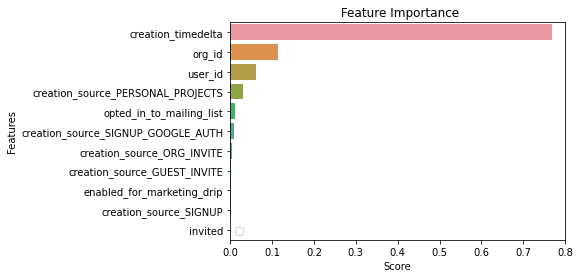

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.title(" Feature Importance")
plt.legend()
plt.xlim(0, 0.8)

# Final thoughts

Looks like the creation time difference between creating and logging on was the most important feauture. As we know, correlation is not causation but let's speculate. It's possible that patrons knew about the site prior to signing on and knew they'd be using it a bunch. The second most important feature is the org_id. It's possible that there's a cultural representation here as "birds of a feathure flock together". People that may spend more time togetehr may have a higher propoensity to particiapte in the same activities, or in this case, the same online system.